# K-means clustering
Here we implement a K-means clustering algorithm to form clusters of similar stocks based on the gathered data. Note that we included sector code in the data above, however, we don't include it when performing the clustering as it is a categorical variable and do not needed to apply the algorithm.

In [26]:
# reading the file we collecting before, we collect 10223 listing company in US with its 10 fc and one return info
import pandas as pd

final = pd.read_csv('final.csv', index_col=0)  

In [56]:
final

,CTVA,MBC,GMED,ICL,ABT,DD,MRK,HPE,RCL,IR,...,UZF,GHG,ENO,RCB,RCC,ENJ,WLYB,SEATW,SOHOO,ORAN
currentRatio,1.562110,1.938180,4.881837,1.529189,1.637887,2.425436,1.251965,0.865917,0.190618,2.216604,...,1.553829,1.212555,0.603309,0.401394,0.401394,0.572324,0.604408,0.504331,1.516479,0.815993
quickRatio,0.899318,1.223240,2.720141,0.883624,1.163211,1.732408,1.004515,0.655379,0.164238,1.668746,...,1.332963,1.197303,0.471482,0.380399,0.380399,0.320348,0.570090,0.461240,1.266819,0.778255
inventoryTurnover,1.437890,7.407126,0.646329,3.004617,2.735921,3.928738,2.536332,4.101585,37.197581,4.356608,...,8.683417,46.301248,16.766125,9.343776,9.343776,4.230122,22.534116,9.485298,19.677804,31.604167
fixedAssetTurnover,4.018195,6.542357,2.424742,1.219515,3.557024,1.895101,2.454876,4.864752,0.452400,9.665589,...,1.118877,0.692368,0.522120,447.069712,447.069712,0.274070,5.969924,35.676058,0.489796,1.066573
grossProfitMargin,0.424126,0.321290,0.650505,0.337049,0.551846,0.301044,0.731747,0.351433,0.336331,0.365716,...,0.557604,0.417770,0.338103,0.940354,0.940354,0.438730,0.657141,0.720342,0.282075,0.174833
netProfitMargin,0.042668,0.066760,0.078339,0.084526,0.142686,0.035051,0.006072,0.069504,0.122086,0.113247,...,0.013825,0.165503,0.271275,0.299047,0.299047,0.194470,0.008532,0.104556,0.022673,0.055301
returnOnAssets,0.017095,0.076416,0.024159,0.056111,0.078168,0.010972,0.003422,0.035431,0.048305,0.050034,...,0.005023,0.053153,0.109123,0.027284,0.027284,0.039567,0.005543,0.048085,0.010018,0.021455
returnOnEquity,0.029357,0.152454,0.030734,0.113107,0.148253,0.017422,0.009712,0.095600,0.359229,0.079591,...,0.011673,0.186738,0.283777,0.133207,0.133207,0.161166,0.016490,0.709752,0.080061,0.090791
debtEquityRatio,0.099413,0.606383,0.107397,0.430479,0.386602,0.324849,0.940369,0.583278,4.554826,0.278379,...,0.871163,1.271129,0.839723,3.678536,3.678536,1.790606,0.845437,2.557348,6.449795,1.694921
interestCoverage,4.038627,4.733129,6.614108,6.908046,10.169545,4.335859,3.197208,13.391026,2.059914,7.430121,...,0.709184,23.883074,0.068693,1.218007,1.218007,2.601311,5.536177,5.948908,1.033827,3.513755


In [28]:
%matplotlib inline

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
def kmeans_clustering(final_df):
    # Extract the financial features for clustering
    features = ['currentRatio', 'quickRatio', 'inventoryTurnover', 
                'fixedAssetTurnover', 'grossProfitMargin', 'netProfitMargin', 
                'returnOnAssets', 'returnOnEquity', 'debtEquityRatio', 
                'interestCoverage', '2024 Return (%)']
    
    df = final_df.T[features]
    
    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # Determine the optimal numbers of clustring using elbow method
    sse = []
    k_range = range(1, 35)  #  choose 35 at max 
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
        kmeans.fit(df_scaled)
        sse.append(kmeans.inertia_)

    # plot the 'elbow' plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, marker="o")
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE (Sum of Squared Distances)")
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.show()

    # prompt the user to type a best input based on elbow plot result
    optimal_k = int(input("Enter the optimal number of clusters based on the elbow plot: "))
    
    # perform k-means
    kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    # add cluster label to the dataframe
    df['Cluster'] = labels

    # calculate the label numbers of each clustering
    cluster_counts = df['Cluster'].value_counts()
    cluster_counts = cluster_counts[cluster_counts >= 2]
    print("Top 10 clusters and their counts:")
    print(cluster_counts.head(10))

    # Return dataframe and its clustering label numbers.
    return df, cluster_counts

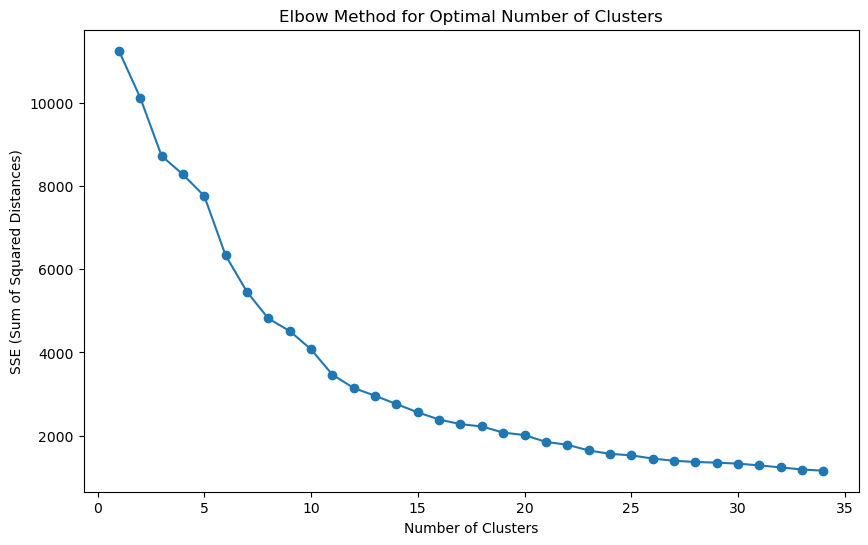

Enter the optimal number of clusters based on the elbow plot: 30
Top 10 clusters and their counts:
Cluster
17    168
25    121
13     96
0      92
10     86
18     72
24     67
2      64
4      38
26     37
Name: count, dtype: int64


In [88]:
df, cluster_counts = kmeans_clustering(final)

In [89]:
df

,currentRatio,quickRatio,inventoryTurnover,fixedAssetTurnover,grossProfitMargin,netProfitMargin,returnOnAssets,returnOnEquity,debtEquityRatio,interestCoverage,2024 Return (%),Cluster
CTVA,1.562110,0.899318,1.437890,4.018195,0.424126,0.042668,0.017095,0.029357,0.099413,4.038627,28.264519,17
MBC,1.938180,1.223240,7.407126,6.542357,0.321290,0.066760,0.076416,0.152454,0.606383,4.733129,18.909828,10
GMED,4.881837,2.720141,0.646329,2.424742,0.650505,0.078339,0.024159,0.030734,0.107397,6.614108,55.586906,9
ICL,1.529189,0.883624,3.004617,1.219515,0.337049,0.084526,0.056111,0.113107,0.430479,6.908046,-11.386930,10
ABT,1.637887,1.163211,2.735921,3.557024,0.551846,0.142686,0.078168,0.148253,0.386602,10.169545,8.448680,25
...,...,...,...,...,...,...,...,...,...,...,...,...
ENJ,0.572324,0.320348,4.230122,0.274070,0.438730,0.194470,0.039567,0.161166,1.790606,2.601311,12.601592,25
WLYB,0.604408,0.570090,22.534116,5.969924,0.657141,0.008532,0.005543,0.016490,0.845437,5.536177,62.012400,9
SEATW,0.504331,0.461240,9.485298,35.676058,0.720342,0.104556,0.048085,0.709752,2.557348,5.948908,-64.197532,13
SOHOO,1.516479,1.266819,19.677804,0.489796,0.282075,0.022673,0.010018,0.080061,6.449795,1.033827,-7.521073,0


In [90]:
cluster_counts

Cluster
17    168
25    121
13     96
0      92
10     86
18     72
24     67
2      64
4      38
26     37
9      36
15     36
28     36
1      17
20     13
19     10
16      7
29      7
14      5
23      3
12      2
7       2
Name: count, dtype: int64

In [91]:
def get_combinations_of_pairs(cluster_counts, df):
    target_clusters = list(cluster_counts.index)
    
    dct = {}
    for n_cluster in target_clusters:
        dct[n_cluster] = list(df[df['Cluster'] == n_cluster].index)
        
    pairs = []
    for e in tqdm(dct):
        pairs += list(itertools.combinations(dct[e], 2))
    return pairs

In [103]:
pairs = get_combinations_of_pairs(cluster_counts, df)
type(pairs)

  0%|          | 0/22 [00:00<?, ?it/s]

list

# Pearson correlation coefficient sorting
approach to pair selection to complement our machine learning approach, picking pairs with the highest Pearson correlations out of the clusters obtained by K-means clustering.

In [93]:
prices = pd.read_csv('prices.csv', index_col=0) 

In [94]:
prices

,A,AAP,ABBV,ABEV,ABG,ABLVW,ABT,ACA,ACEL,ACI,...,XOM,XYL,YETI,YOU,ZBH,ZGN,ZIP,ZTO,ZTS,ZWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00+00:00,138.268341,60.839668,154.183807,2.76,222.839996,NaN,107.700714,81.837875,10.34,22.289557,...,99.796883,112.744019,50.369999,19.855873,120.893456,11.173580,13.57,19.760117,194.642242,28.891378
2024-01-03 00:00:00+00:00,130.704697,59.906696,154.801224,2.75,208.669998,NaN,107.377174,78.864868,9.89,22.172394,...,100.635368,110.651207,47.139999,19.671301,119.977226,11.054923,13.51,20.103769,191.037918,27.968363
2024-01-04 00:00:00+00:00,130.545242,59.405842,155.765976,2.76,207.000000,NaN,108.808601,78.276245,9.83,22.006422,...,99.757889,111.414940,46.080002,20.555296,119.708321,10.867048,13.66,19.559652,192.137054,28.107309
2024-01-05 00:00:00+00:00,130.106781,60.417377,156.421967,2.78,205.539993,NaN,108.632126,78.186455,9.85,22.494585,...,100.060135,111.236404,45.570000,20.953579,119.489227,10.807719,13.81,19.044170,192.939102,27.720240
2024-01-08 00:00:00+00:00,132.916992,60.800388,155.737000,2.79,208.750000,NaN,110.200821,79.134224,9.96,22.445768,...,98.392944,111.930695,46.520000,21.351860,121.471092,10.827496,14.21,18.757792,194.226349,27.839338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 00:00:00+00:00,130.309998,35.689999,203.869995,2.18,227.839996,NaN,113.370003,93.639999,11.04,18.100000,...,116.779999,121.779999,35.209999,36.779999,106.919998,7.600000,9.27,23.110001,178.779999,36.099998
2024-11-01 00:00:00+00:00,136.869995,36.250000,203.550003,2.15,227.979996,NaN,118.599998,93.690002,11.02,18.660000,...,114.949997,119.459999,35.419998,36.840000,107.269997,7.600000,9.22,23.090000,181.949997,37.080002
2024-11-04 00:00:00+00:00,139.649994,37.450001,200.470001,2.21,236.979996,NaN,117.650002,95.660004,11.03,18.450001,...,118.610001,120.839996,36.740002,34.770000,108.410004,7.620000,9.07,22.459999,175.179993,37.150002


In [107]:
def calculating_pearson(prices, pairs):
    final_pairs = []
    pearson_pairs = []
    returns = prices.pct_change()
    for pair in tqdm(pairs):
        pair_returns = returns[list(pair)]
        pearson = pair_returns.astype(float).corr().iloc[0,1]
        final_pairs.append(pair)
        pearson_pairs.append(pearson)
        
    df = pd.DataFrame({'pair': final_pairs, 'pearson_corr': pearson_pairs})
    return df

In [108]:
# Calculating Pearson coefficient
df_cof = calculating_pearson(prices, pairs)
df_cof.head()

  0%|          | 0/44047 [00:00<?, ?it/s]

,pair,pearson_corr
0,"(CTVA, DD)",0.239196
1,"(CTVA, HPE)",0.138855
2,"(CTVA, DIS)",0.132488
3,"(CTVA, FCX)",0.289997
4,"(CTVA, EGO)",0.256856


In [110]:
print(df_cof.sort_values('pearson_corr', ascending=False)[:10])

              pair  pearson_corr
42216   (UZE, UZF)      0.952185
42171   (UZD, UZE)      0.911760
42193   (UZD, UZF)      0.900402
18429   (MLM, VMC)      0.885454
20392   (CMS, DTE)      0.876914
39663   (MHO, KBH)      0.863259
32703   (VLO, MPC)      0.858748
41241  (ASB, FMBH)      0.858611
32710   (VLO, PBF)      0.857222
41206  (PFS, FMBH)      0.850813


In [112]:
def sort_and_select_pairs(df):
    df = df.sort_values('pearson_corr', ascending=False)
    selected_pairs = df[df['pearson_corr'] <= 0.95][:50]
    return selected_pairs

In [118]:
selected_pairs = sort_and_select_pairs(df_cof)
selected_pairs

,pair,pearson_corr
42171,"(UZD, UZE)",0.911760
42193,"(UZD, UZF)",0.900402
18429,"(MLM, VMC)",0.885454
20392,"(CMS, DTE)",0.876914
39663,"(MHO, KBH)",0.863259
32703,"(VLO, MPC)",0.858748
41241,"(ASB, FMBH)",0.858611
32710,"(VLO, PBF)",0.857222
41206,"(PFS, FMBH)",0.850813
41175,"(PFS, ASB)",0.848494


In [116]:
selected_pairs.to_csv("selected_pairs.csv",index=True)